# [Can You Win at “Rock, Paper, Scissors, Lizard, Spock?”](https://thefiddler.substack.com/p/can-you-win-at-rock-paper-scissors)
27 September 2024

## Problem

_In a game of “Rock, Paper, Scissors,” each element you can throw ties itself, beats one of the other elements, and loses to the remaining element. In particular, Rock beats Scissors beats Paper beats Rock.
“Rock, Paper, Scissors, Lizard, Spock” (popularized via The Big Bang Theory) is similar, but has five elements you can throw instead of the typical three. Each element ties itself, beats another two, and loses to the remaining two. More specifically, Scissors beats Paper beats Rock beats Lizard beats Spock beats Scissors beats Lizard beats Paper beats Spock beats Rock beats Scissors._

_Three players are playing “Rock, Paper, Scissors, Lizard, Spock.” At the same time, they all put out their hands, revealing one of the five elements. If they each chose their element randomly and independently, what is the probability that one player is immediately victorious, having defeated the other two?_

## Solution

To find the probability of a singular winner after one round, it may be helpful to start with the instances when this doesn't occur:

1) There is a two-way or three-way tie to win.  If two players beat the third player with the same selection, there won't me a unique winner. Similarly, if each of the players make the same selection, they all tie and there isn't a unique winner
2) All players are eliminated at once.

For there to be one unique winner, one play must explicitly beat both of the other players.

It doesn't matter what that player selects, so long as the other players make loosing picks. This occurse with probability $\frac{2}{5}$ for each player since there are two selections that lose to any given selection. So that probability of that particular player winning is

$ P_i(\text{Win}) = \frac{2}{5} \frac{2}{5} = \frac{4}{25}$

For the probability of any of them to win, that would be 

$ P(\text{A Win} \cup  \text{B Win} \cup \text{C Win}) $

Since these are all mutually exlusive, we can seperate them out

$ P(\text{A Win}) + P(\text{B Win}) + P(\text{C Win}) = 3 \frac{4}{25} = \frac{12}{25} $

So the probability of there be a clear winner after one round is $\boxed{\frac{12}{25} = 48 \%}$ 

Below is a simulation to verify


In [1]:
import random

# Define the elements
elements = ['Rock', 'Paper', 'Scissors', 'Lizard', 'Spock']

# Define the rules: which elements each element beats
beats = {
    'Rock': ['Scissors', 'Lizard'],
    'Paper': ['Rock', 'Spock'],
    'Scissors': ['Paper', 'Lizard'],
    'Lizard': ['Spock', 'Paper'],
    'Spock': ['Scissors', 'Rock']
}

def simulate_games(num_simulations):
    immediate_victories = 0

    for _ in range(num_simulations):
        # Each player randomly selects an element
        player1 = random.choice(elements)
        player2 = random.choice(elements)
        player3 = random.choice(elements)

        # Function to determine if a player beats both others
        def is_victorious(player, opponent1, opponent2):
            return opponent1 in beats[player] and opponent2 in beats[player]

        # Check for each player if they are victorious
        p1_victory = is_victorious(player1, player2, player3)
        p2_victory = is_victorious(player2, player1, player3)
        p3_victory = is_victorious(player3, player1, player2)

        # Count the number of immediate victories in this round
        total_victories = p1_victory + p2_victory + p3_victory

        # Since it's impossible for more than one player to be victorious simultaneously,
        # we can safely increment if exactly one player is victorious
        if total_victories == 1:
            immediate_victories += 1

    # Calculate the probability
    probability = immediate_victories / num_simulations
    return probability

# Number of simulations
NUM_SIMULATIONS = 1_000_000

# Run the simulation
estimated_probability = simulate_games(NUM_SIMULATIONS)
print(f"Estimated Probability of Immediate Victory: {estimated_probability:.4f}")

# For comparison, print the analytical probability
analytical_probability = 12 / 25
print(f"Analytical Probability: {analytical_probability:.4f}")


Estimated Probability of Immediate Victory: 0.4799
Analytical Probability: 0.4800


## Extra credit

_The rules for “Rock, Paper, Scissors” can concisely be written in one of the following three ways:_

- _Rock beats Scissors beats Paper beats Rock_

- _Scissors beats Paper beats Rock beats Scissors_

- _Paper beats Rock beats Scissors beats Paper_

_Each description of the rules includes four mentions of elements and three “beats.”_

_Meanwhile, as previously mentioned, a similarly concise version of the rules for “Rock, Paper, Scissors, Lizard, Spock” (and adapted from the original site) is:_

- _Scissors beats Paper beats Rock beats Lizard beats Spock beats Scissors beats Lizard beats Paper beats Spock beats Rock beats Scissors_

_In this case, there are 11 mentions of elements and 10 “beats.” Including the one above, how many such ways are there to concisely describe the rules for “Rock, Paper, Scissors, Lizard, Spock?”_

## Solution

If we imagine the rules of the game as a directed graph where if node $n_i$ points to $n_j$, it means $n_i$ beats $n_j$.

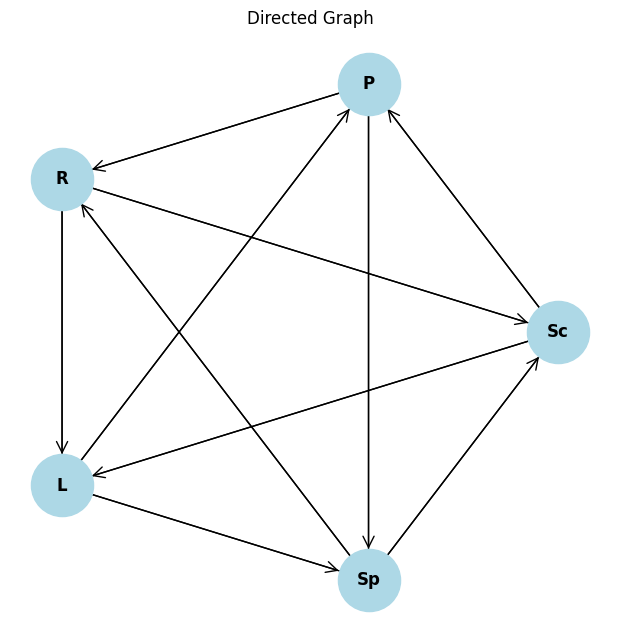

In [3]:
# Re-import necessary libraries and redefine graph to correct the error
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes
nodes = ['Sc', 'P', 'R', 'L', 'Sp']
G.add_nodes_from(nodes)

# Add edges
edges = [('Sc', 'P'), ('Sc', 'L'), ('P', 'R'), ('R', 'L'), ('L', 'Sp'), 
         ('Sp', 'Sc'), ('L', 'P'), ('P', 'Sp'), ('Sp', 'R'), ('R', 'Sc')]
G.add_edges_from(edges)

# Use a circular layout to make the graph more symmetrical, like a pentagon
pos = nx.circular_layout(G)

# Draw the graph
plt.figure(figsize=(6, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12, font_weight='bold', arrowstyle='->', arrowsize=20)
nx.draw_networkx_edges(G, pos, edgelist=edges, arrowstyle='->', arrowsize=20)

plt.title("Directed Graph")
plt.show()


If we imagine starting at a node $n_i$, we can then pick the next node we want to go to out of two options. As we advance, the first time we get to a node $n_j$, we will have two options for the next node. Once, we've been to that node once, we will have one option left.  Counting this all up we have $2^5$ possible ways of traversing the graph starting at $n_i$. Of course, there are 5 different starting positions for $n_i$ so we are left with

$ \boxed{5 \cdot 2^5 = 160}$